[['green' 'red' 'purple' 'brown' 'blue' 'brown' 'orange' 'yellow' 'brown'
  'yellow']
 ['blue' 'purple' 'red' 'yellow' 'purple' 'blue' 'brown' 'pink' 'blue'
  'pink']
 ['orange' 'green' 'brown' 'purple' 'orange' 'orange' 'cyan' 'brown'
  'red' 'yellow']
 ['blue' 'brown' 'cyan' 'red' 'purple' 'green' 'red' 'purple' 'blue'
  'yellow']
 ['blue' 'brown' 'brown' 'red' 'lime' 'yellow' 'pink' 'purple' 'red'
  'pink']
 ['brown' 'green' 'orange' 'lime' 'lime' 'blue' 'purple' 'orange' 'brown'
  'red']
 ['purple' 'orange' 'cyan' 'blue' 'pink' 'purple' 'pink' 'cyan' 'green'
  'orange']
 ['red' 'lime' 'yellow' 'cyan' 'brown' 'cyan' 'purple' 'cyan' 'lime'
  'cyan']
 ['pink' 'purple' 'blue' 'blue' 'orange' 'blue' 'blue' 'cyan' 'green'
  'lime']
 ['cyan' 'green' 'blue' 'pink' 'cyan' 'lime' 'red' 'yellow' 'yellow'
  'green']]
[0, 0, 9, 3, 1]
Secvența de stări ascunse: [(1, 0), (0, 0), (1, 0), (0, 0), (0, 1)]


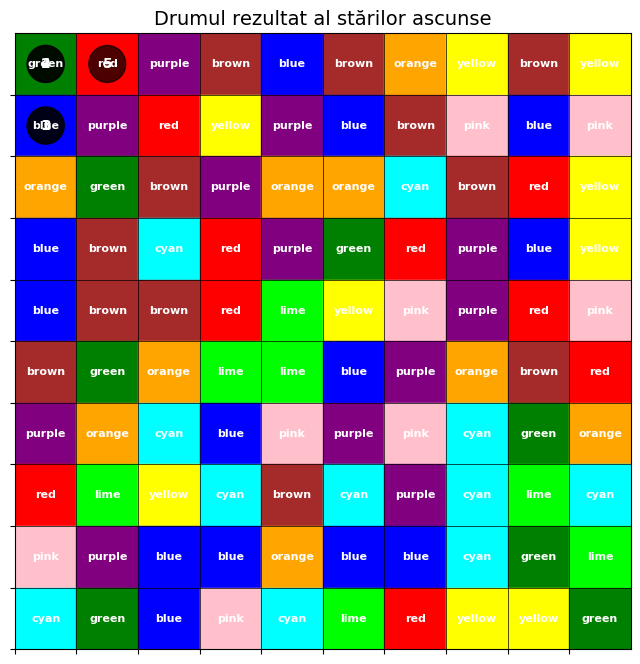

In [2]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dimensiunea gridului
dimensiune_grid = (10, 10)

# Lista de culori predefinite
culori = [
    "red", "blue", "green", "yellow", 
    "purple", "orange", "pink", "cyan", 
    "brown", "lime"
]

# Citirea gridului
df = pd.read_csv('grid_culori.csv',header=None)
grid_culori = df.to_numpy()
print(grid_culori)

# Generarea secvenței de culori observate
observatii = ['red', 'red', 'lime', 'yellow', 'blue']

# Mapare culori -> indecși
culoare_to_idx = {culoare: idx for idx, culoare in enumerate(culori)}
idx_to_culoare = {idx: culoare for culoare, idx in culoare_to_idx.items()}

# Transformăm secvența de observații în indecși
observatii_idx = [culoare_to_idx[c] for c in observatii]
print(observatii_idx)
# Definim stările ascunse ca fiind toate pozițiile din grid (100 de stări)
numar_stari = dimensiune_grid[0] * dimensiune_grid[1]
stari_ascunse = [(i, j) for i in range(dimensiune_grid[0]) for j in range(dimensiune_grid[1])]
stare_to_idx = {stare: idx for idx, stare in enumerate(stari_ascunse)}
idx_to_stare = {idx: stare for stare, idx in stare_to_idx.items()}

# Matrice de tranziție
transitions = np.zeros((numar_stari, numar_stari))

for i, j in stari_ascunse:
    vecini = [
        (i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)  # sus, jos, stânga, dreapta
    ]
    vecini_valizi = [stare_to_idx[(x, y)] for x, y in vecini if 0 <= x < dimensiune_grid[0] and 0 <= y < dimensiune_grid[1]]
    current_idx = stare_to_idx[(i, j)]
    
    for vecin_idx in vecini_valizi:
        transitions[current_idx, vecin_idx] = 1  


transitions = (transitions.T / transitions.sum(axis=1)).T


# Matrice de emisie
emissions = np.ones((numar_stari, len(culori))) / len(culori)
emissions = (emissions.T / emissions.sum(axis=1)).T  
######
## probabilitati de start 
start_probabilities = np.ones(numar_stari) / numar_stari 

# Modelul HMM

######
model = hmm.CategoricalHMM(n_components=numar_stari)
model.startprob_ = start_probabilities
model.transmat_ = transitions
model.emissionprob_ = emissions
observatii_idx = np.array([culoare_to_idx[c] for c in observatii]).reshape(-1, 1)
hidden_states_idx = model.predict(observatii_idx)
hidden_states = [idx_to_stare[idx] for idx in hidden_states_idx]
print("Secvența de stări ascunse:", hidden_states)


# Convertim secvența de stări în poziții din grid
drum = [idx_to_stare[idx] for idx in hidden_states_idx]

# Vizualizăm drumul pe grid
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(dimensiune_grid[0]):
    for j in range(dimensiune_grid[1]):
        culoare = grid_culori[i, j]
        ax.add_patch(plt.Rectangle((j, dimensiune_grid[0] - i - 1), 1, 1, color=culoare))
        ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, culoare, 
                color="white", ha="center", va="center", fontsize=8, fontweight="bold")

# Evidențiem drumul rezultat
for idx, (i, j) in enumerate(drum):
    ax.add_patch(plt.Circle((j + 0.5, dimensiune_grid[0] - i - 0.5), 0.3, color="black", alpha=0.7))
    ax.text(j + 0.5, dimensiune_grid[0] - i - 0.5, str(idx + 1), 
            color="white", ha="center", va="center", fontsize=10, fontweight="bold")

# Setări axă
ax.set_xlim(0, dimensiune_grid[1])
ax.set_ylim(0, dimensiune_grid[0])
ax.set_xticks(range(dimensiune_grid[1]))
ax.set_yticks(range(dimensiune_grid[0]))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(visible=True, color="black", linewidth=0.5)
ax.set_aspect("equal")
plt.title("Drumul rezultat al stărilor ascunse", fontsize=14)
plt.savefig('drumul_starilor', dpi=300, bbox_inches='tight')
plt.show()

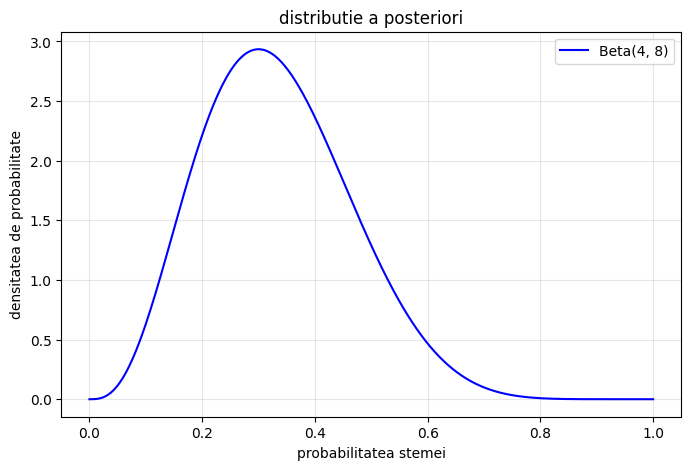

In [4]:
# problema 3 a)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

alpha_prior = 1
beta_prior = 1
observations= ['s','b','b','b','s','b','s','b','b','b']

successes = 3  
failures = 7   

alpha_posterior = alpha_prior + successes
beta_posterior = beta_prior + failures

p = np.linspace(0, 1, 500)

posterior_pdf = beta.pdf(p, alpha_posterior, beta_posterior)

plt.figure(figsize=(8, 5))
plt.plot(p, posterior_pdf, label=f'Beta({alpha_posterior}, {beta_posterior})', color='blue')
plt.title("distributie a posteriori")
plt.xlabel("probabilitatea stemei")
plt.ylabel("densitatea de probabilitate")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('3a', dpi=300, bbox_inches='tight')
plt.show()


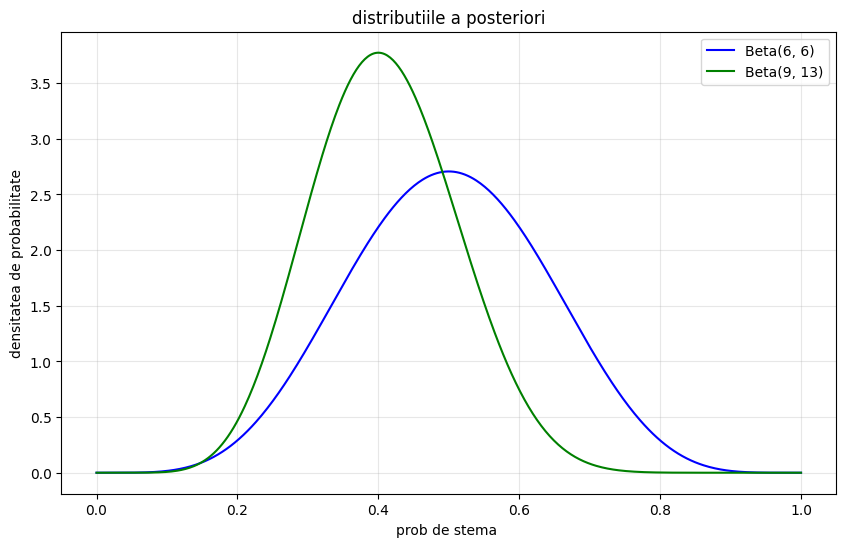

In [5]:
# problema 3 b)
 
observations=['s','s','b','s','b','b','s','b','b','s']

successes_new = 5  
failures_new = 5   

alpha_prior_i = 1
beta_prior_i = 1

alpha_posterior_i = alpha_prior_i + successes_new
beta_posterior_i = beta_prior_i + failures_new

alpha_prior_ii = 4
beta_prior_ii = 8

alpha_posterior_ii = alpha_prior_ii + successes_new
beta_posterior_ii = beta_prior_ii + failures_new

p = np.linspace(0, 1, 500)

posterior_pdf_i = beta.pdf(p, alpha_posterior_i, beta_posterior_i)
posterior_pdf_ii = beta.pdf(p, alpha_posterior_ii, beta_posterior_ii)

plt.figure(figsize=(10, 6))
plt.plot(p, posterior_pdf_i, label=f'Beta({alpha_posterior_i}, {beta_posterior_i})', color='blue')
plt.plot(p, posterior_pdf_ii, label=f'Beta({alpha_posterior_ii}, {beta_posterior_ii})', color='green')
plt.title("distributiile a posteriori")
plt.xlabel("prob de stema ")
plt.ylabel("densitatea de probabilitate")
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('3b', dpi=300, bbox_inches='tight')
plt.show()